In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
import joblib

In [3]:
file_path = 'E:\Project-IndianElectric\Data\electricity_bill_dataset.csv'
df = pd.read_csv(file_path)

df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [4]:
# Encode Categorical Variables
label_encoders = {}
for col in ["City", "Company"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
# Define Features & Target
X = df.drop(columns=["ElectricityBill"])
y = df["ElectricityBill"]


In [6]:
# Normalize Numerical Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Results:")
    print(f"MAE={mae:.4f}, MSE={mse:.4f}, RMSE={rmse:.4f}, R2 Score={r2:.4f}")
    
    return {"Model": model_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

results = []

In [9]:
# Train SVM Model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_svm, "SVM"))

SVM Results:
MAE=277.3983, MSE=173957.0561, RMSE=417.0816, R2 Score=0.8473


In [10]:
# Train KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_knn, "KNN"))

KNN Results:
MAE=180.4570, MSE=52093.4474, RMSE=228.2399, R2 Score=0.9543


In [11]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))

Random Forest Results:
MAE=1.4098, MSE=28.3411, RMSE=5.3236, R2 Score=1.0000


In [12]:
# Reshape Data for RNN/LSTM
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [13]:
rnn_model = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
    SimpleRNN(32, activation='relu'),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, verbose=1)
y_pred_rnn = rnn_model.predict(X_test_rnn).flatten()
results.append(evaluate_model(y_test, y_pred_rnn, "RNN"))

c:\Users\marcu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 14741220.0000
Epoch 2/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 289936.2812
Epoch 3/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 115675.2109
Epoch 4/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 65923.6797
Epoch 5/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 35888.6953
Epoch 6/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17854.5723
Epoch 7/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8804.0713
Epoch 8/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4544.1890
Epoch 9/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2428.8005
Epoch 10/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1436.4550
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
RNN Results:
MAE=23.3564, MSE=1051.9347, RMSE=32.4335, R2 Score=0.9991


In [14]:
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, verbose=1)
y_pred_lstm = lstm_model.predict(X_test_rnn).flatten()
results.append(evaluate_model(y_test, y_pred_lstm, "LSTM"))

Epoch 1/10


c:\Users\marcu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1134/1134 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 14932272.0000
Epoch 2/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 438869.8125
Epoch 3/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 150130.1094
Epoch 4/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 81986.3438
Epoch 5/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 41187.1133
Epoch 6/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 16237.7930
Epoch 7/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7999.6118
Epoch 8/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4656.7148
Epoch 9/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2974.4548
Epoch 10/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1956.1708
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
LSTM Results:
MAE=24.4463, MSE=1448.5031, RMSE=38.0592, R2 Score=0.9987


In [15]:
results_df = pd.DataFrame(results)

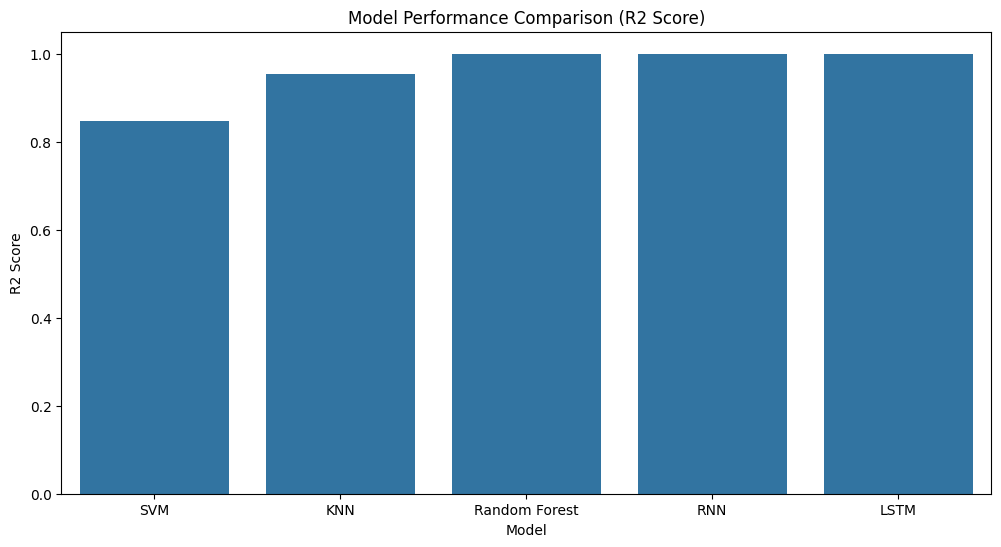

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='R2 Score', data=results_df)
plt.title('Model Performance Comparison (R2 Score)')
plt.show()

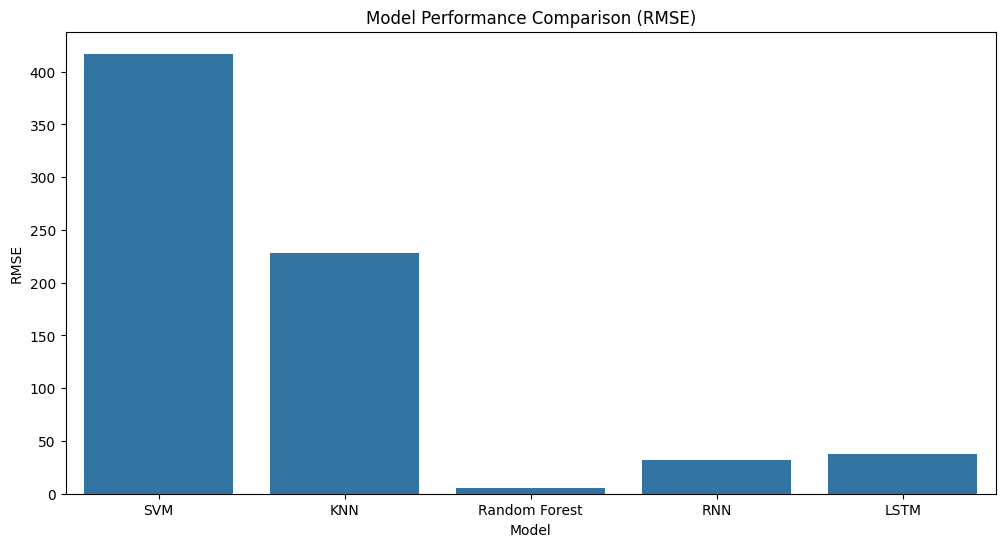

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('Model Performance Comparison (RMSE)')
plt.show()


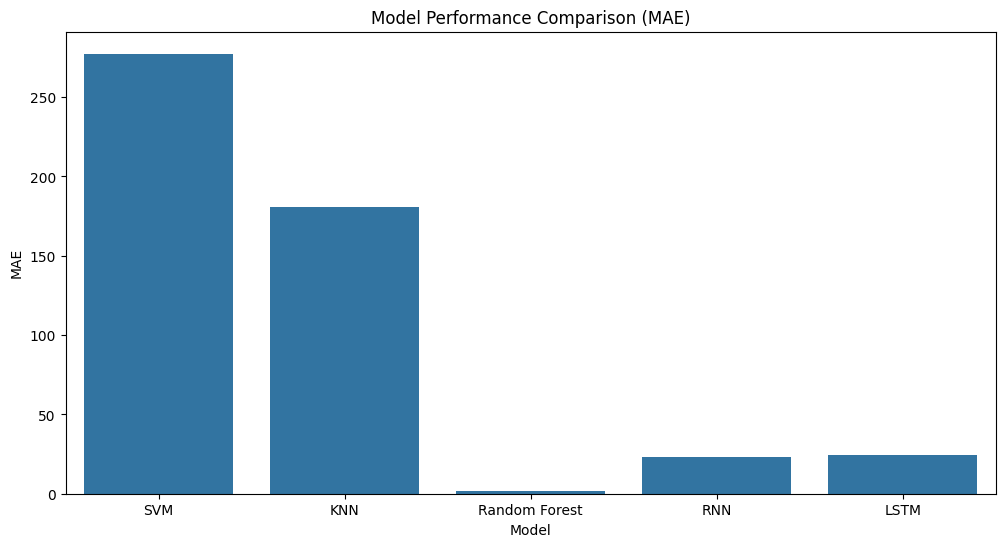

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('Model Performance Comparison (MAE)')
plt.show()

In [19]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, np.round(y_pred))
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [20]:
joblib.dump(svm_model, "../models/svm_model.pkl")
joblib.dump(knn_model, "../models/knn_model.pkl")
joblib.dump(rf_model, "../models/rf_model.pkl")
lstm_model.save("../models/lstm_model.h5")
rnn_model.save("../models/rnn_model.h5")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']

In [21]:
print("Models saved successfully!")

Models saved successfully!
